# ERAU Wildlife Strike Database Research
## Multinomial Regressional Analysis

Preliminary Analysis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
data=pd.read_excel('ERAU_Database.xlsx')
#Load the first 5 rows of the database
data.head()

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N


In [22]:
#Check the number of rows and columns we have in this database. We have 136622 rows. 

data.shape

(136622, 13)

In [23]:
#Check data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136622 entries, 0 to 136621
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   INCIDENT_MONTH   136622 non-null  int64 
 1   TIME_OF_DAY      105099 non-null  object
 2   AIRPORT_ID       136622 non-null  object
 3   AIRPORT          136622 non-null  object
 4   STATE            114501 non-null  object
 5   AC_CLASS         136622 non-null  object
 6   AC_MASS          136622 non-null  int64 
 7   TYPE_ENG         136571 non-null  object
 8   NUM_ENGS         136622 non-null  int64 
 9   PHASE_OF_FLIGHT  114206 non-null  object
 10  SKY              91212 non-null   object
 11  PRECIPITATION    88298 non-null   object
 12  DAMAGE_LEVEL     136622 non-null  object
dtypes: int64(3), object(10)
memory usage: 13.6+ MB


In [29]:
#Change data type to categorical for all columns
data=data.astype({"INCIDENT_MONTH":str,"AC_MASS":str,"NUM_ENGS":str})


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136622 entries, 0 to 136621
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   INCIDENT_MONTH   136622 non-null  object
 1   TIME_OF_DAY      105099 non-null  object
 2   AIRPORT_ID       136622 non-null  object
 3   AIRPORT          136622 non-null  object
 4   STATE            114501 non-null  object
 5   AC_CLASS         136622 non-null  object
 6   AC_MASS          136622 non-null  object
 7   TYPE_ENG         136571 non-null  object
 8   NUM_ENGS         136622 non-null  object
 9   PHASE_OF_FLIGHT  114206 non-null  object
 10  SKY              91212 non-null   object
 11  PRECIPITATION    88298 non-null   object
 12  DAMAGE_LEVEL     136622 non-null  object
dtypes: object(13)
memory usage: 13.6+ MB


In [31]:
#Describe all columns
data.describe()

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL
count,136622,105099,136622,136622,114501,136622,136622,136571,136622,114206,91212,88298,136622
unique,12,4,1240,1240,63,1,3,4,4,11,3,11,4
top,10,Day,ZZZZ,UNKNOWN,TX,A,4,D,2,Approach,No Cloud,None,N
freq,19139,61728,22120,22120,11427,136622,108335,127682,124498,53220,44708,80962,128561


# Creating Dummy Variables for Categorical Data

In [32]:
Data=data.copy()

In [33]:
#Dummy variables for Time of Day Column
Data['Num_Time']=Data['TIME_OF_DAY'].map({'Dawn':1,'Day':2,'Dusk':3,'Night':4})

In [34]:
Data.head()

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S,2.0
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N,2.0
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N,2.0
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N,2.0
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N,1.0


In [35]:
#Dummy variables for Type of Engine
Data['Num_TYPE_ENG']=Data['TYPE_ENG'].map({'A':1,'B':2,'C':3,'D':4})

### Phase of Flight

In [36]:
#Unique values for 'Phase of flight' column
Data['PHASE_OF_FLIGHT'].unique

<bound method Series.unique of 0         Take-off Run
1         Take-off Run
2             Approach
3         Landing Roll
4                Climb
              ...     
136617           Climb
136618    Landing Roll
136619    Take-off Run
136620    Landing Roll
136621             NaN
Name: PHASE_OF_FLIGHT, Length: 136622, dtype: object>

In [37]:
Data['Num_PHASE_OF_FLIGHT']=Data['PHASE_OF_FLIGHT'].map({'Take-off Run':1,'Approach':2,'Landing Roll':3,'Climb':4})

### Sky Condition

In [38]:
#Unique values for 'Sky' conditions column
Data['SKY'].unique()

array(['Overcast', 'Some Cloud', 'No Cloud', nan], dtype=object)

In [39]:
Data['Num_SKY']=Data['SKY'].map({'Overcast':1,'Some Cloud':2,'No Cloud':3})

### Precipitation

In [40]:
#Unique values for 'Precipitation' conditions column
Data['PRECIPITATION'].unique()

array(['Rain', 'None', nan, 'Fog', 'Snow', 'Fog, Rain', 'Fog, Snow',
       'Rain, Snow', 'Fog, Rain, Snow', 'None, Snow', 'Fog, None',
       'None, Rain'], dtype=object)

In [41]:
#Dummy variables for precipitation
Data['Num_PRECIPITATION']=Data['PRECIPITATION'].map({'Rain':1,'Fog':2,'Snow':3,'Fog, Rain':4,'Fog, Snow':5,'Rain, Snow':6,'Fog, Rain, Snow':7,'None, Snow':'8','Fog, None':9,'None, Rain':10,'None':11})

### Damage Level (DV)

In [42]:
Data['DAMAGE_LEVEL'].unique()

array(['S', 'N', 'M', 'D'], dtype=object)

In [43]:
Data['Num_DAMAGE_LEVEL']=Data['DAMAGE_LEVEL'].map({'S':1,'N':2,'M':3,'D':4})

## Verification of Dummy Variables

In [44]:
Data.head()

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_SKY,Num_PRECIPITATION,Num_DAMAGE_LEVEL
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S,2.0,4.0,1.0,1.0,1,1
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N,2.0,4.0,1.0,2.0,11,2
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N,2.0,4.0,3.0,3.0,11,2
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N,1.0,4.0,4.0,3.0,11,2


In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136622 entries, 0 to 136621
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_MONTH       136622 non-null  object 
 1   TIME_OF_DAY          105099 non-null  object 
 2   AIRPORT_ID           136622 non-null  object 
 3   AIRPORT              136622 non-null  object 
 4   STATE                114501 non-null  object 
 5   AC_CLASS             136622 non-null  object 
 6   AC_MASS              136622 non-null  object 
 7   TYPE_ENG             136571 non-null  object 
 8   NUM_ENGS             136622 non-null  object 
 9   PHASE_OF_FLIGHT      114206 non-null  object 
 10  SKY                  91212 non-null   object 
 11  PRECIPITATION        88298 non-null   object 
 12  DAMAGE_LEVEL         136622 non-null  object 
 13  Num_Time             105099 non-null  float64
 14  Num_TYPE_ENG         136571 non-null  float64
 15  Num_PHASE_OF_FLIG

In [46]:
#Change data type to categorical for all columns
Data=Data.astype(str)

In [47]:
#Data type for all columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136622 entries, 0 to 136621
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_MONTH       136622 non-null  object
 1   TIME_OF_DAY          136622 non-null  object
 2   AIRPORT_ID           136622 non-null  object
 3   AIRPORT              136622 non-null  object
 4   STATE                136622 non-null  object
 5   AC_CLASS             136622 non-null  object
 6   AC_MASS              136622 non-null  object
 7   TYPE_ENG             136622 non-null  object
 8   NUM_ENGS             136622 non-null  object
 9   PHASE_OF_FLIGHT      136622 non-null  object
 10  SKY                  136622 non-null  object
 11  PRECIPITATION        136622 non-null  object
 12  DAMAGE_LEVEL         136622 non-null  object
 13  Num_Time             136622 non-null  object
 14  Num_TYPE_ENG         136622 non-null  object
 15  Num_PHASE_OF_FLIGHT  136622 non-nu

### Dummy Variable for States

In [48]:
Data['STATE'].unique()

array(['NE', 'FL', 'NJ', 'AR', 'TN', 'OH', 'HI', 'KY', 'nan', 'OK', 'CA',
       'IA', 'VA', 'IL', 'DC', 'MI', 'OR', 'NY', 'WA', 'NC', 'WV', 'TX',
       'MO', 'GA', 'CO', 'LA', 'MD', 'WI', 'RI', 'ID', 'MA', 'PA', 'MS',
       'UT', 'FN', 'AL', 'AZ', 'CT', 'AK', 'AB', 'PR', 'NM', 'ND', 'QC',
       'WY', 'SC', 'ME', 'IN', 'NH', 'MN', 'KS', 'NV', 'MT', 'VI', 'ON',
       'DE', 'SD', 'VT', 'PI', 'BC', 'SK', 'MB', 'NL', 'NS'], dtype=object)

In [49]:
Data['Num_STATE']=Data['STATE'].map({'NE':1,'FL':2,'NJ':3,'AR':3,'TN':4,'OH':5,'HI':6,'KY':7,'OK':8,'CA':9,'IA':10,'VA':11,'IL':12,'DC':13,'MI':14,'OR':15,'NY':16,'WA':17,'NC':18,'WV':19,'TX':20,'MO':21,'GA':22,'CO':23,'LA':24,'MD':25,'WI':26,'RI':27,'ID':28,'MA':29,'PA':30,'MS':31,'UT':32,'FN':33,'AL':34,'AZ':35,'CT':36,'AK':37,'AB':38,'PR':39,'NM':40,'ND':41,'QC':42,'WY':62,'SC':43,'ME':44,'IN':45,'NH':46,'MN':47,'KS':48,'NV':49,'MT':50,'VI':52,'ON':53,'DE':54,'SD':55,'VT':55,'PI':56,'BC':57,'SK':58,'MB':59,'NL':60,'NS':61})

In [50]:
Data.head()

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_SKY,Num_PRECIPITATION,Num_DAMAGE_LEVEL,Num_STATE
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S,2.0,4.0,1.0,1.0,1,1,1.0
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N,2.0,4.0,1.0,2.0,11,2,2.0
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2,3.0
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N,2.0,4.0,3.0,3.0,11,2,2.0
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N,1.0,4.0,4.0,3.0,11,2,3.0


In [51]:
Data=Data.astype(str)

In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136622 entries, 0 to 136621
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_MONTH       136622 non-null  object
 1   TIME_OF_DAY          136622 non-null  object
 2   AIRPORT_ID           136622 non-null  object
 3   AIRPORT              136622 non-null  object
 4   STATE                136622 non-null  object
 5   AC_CLASS             136622 non-null  object
 6   AC_MASS              136622 non-null  object
 7   TYPE_ENG             136622 non-null  object
 8   NUM_ENGS             136622 non-null  object
 9   PHASE_OF_FLIGHT      136622 non-null  object
 10  SKY                  136622 non-null  object
 11  PRECIPITATION        136622 non-null  object
 12  DAMAGE_LEVEL         136622 non-null  object
 13  Num_Time             136622 non-null  object
 14  Num_TYPE_ENG         136622 non-null  object
 15  Num_PHASE_OF_FLIGHT  136622 non-nu

# Missing Variables
#### Analyzing the missing variables in each column

In [53]:
Data.head(100)

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_SKY,Num_PRECIPITATION,Num_DAMAGE_LEVEL,Num_STATE
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S,2.0,4.0,1.0,1.0,1,1,1.0
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N,2.0,4.0,1.0,2.0,11,2,2.0
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2,3.0
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N,2.0,4.0,3.0,3.0,11,2,2.0
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N,1.0,4.0,4.0,3.0,11,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,nan,KBTR,"BATON ROUGE METROPOLITAN, RYAN FIELD",LA,A,4,D,3,Climb,No Cloud,None,N,nan,4.0,4.0,3.0,11,2,24.0
96,12,Day,ZZZZ,UNKNOWN,nan,A,4,D,2,nan,Some Cloud,None,N,2.0,4.0,nan,2.0,11,2,nan
97,8,Day,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,A,4,D,2,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2,25.0
98,1,Day,KFMY,PAGE FIELD ARPT,FL,A,3,D,2,Take-off Run,No Cloud,None,M,2.0,4.0,1.0,3.0,11,3,2.0


In [54]:
Data.replace("nan",np.nan,inplace=True)
Data.head(100)

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_SKY,Num_PRECIPITATION,Num_DAMAGE_LEVEL,Num_STATE
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,Overcast,Rain,S,2.0,4.0,1.0,1.0,1,1,1.0
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,Some Cloud,None,N,2.0,4.0,1.0,2.0,11,2,2.0
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2,3.0
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,No Cloud,None,N,2.0,4.0,3.0,3.0,11,2,2.0
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,No Cloud,None,N,1.0,4.0,4.0,3.0,11,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,NaN,KBTR,"BATON ROUGE METROPOLITAN, RYAN FIELD",LA,A,4,D,3,Climb,No Cloud,None,N,NaN,4.0,4.0,3.0,11,2,24.0
96,12,Day,ZZZZ,UNKNOWN,NaN,A,4,D,2,NaN,Some Cloud,None,N,2.0,4.0,NaN,2.0,11,2,NaN
97,8,Day,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,A,4,D,2,Approach,No Cloud,None,N,2.0,4.0,2.0,3.0,11,2,25.0
98,1,Day,KFMY,PAGE FIELD ARPT,FL,A,3,D,2,Take-off Run,No Cloud,None,M,2.0,4.0,1.0,3.0,11,3,2.0


In [55]:
missing_data=Data.isnull()
missing_data.head(100)

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,SKY,PRECIPITATION,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_SKY,Num_PRECIPITATION,Num_DAMAGE_LEVEL,Num_STATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
96,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

INCIDENT_MONTH
False    136622
Name: INCIDENT_MONTH, dtype: int64

TIME_OF_DAY
False    105099
True      31523
Name: TIME_OF_DAY, dtype: int64

AIRPORT_ID
False    136622
Name: AIRPORT_ID, dtype: int64

AIRPORT
False    136622
Name: AIRPORT, dtype: int64

STATE
False    114501
True      22121
Name: STATE, dtype: int64

AC_CLASS
False    136622
Name: AC_CLASS, dtype: int64

AC_MASS
False    136622
Name: AC_MASS, dtype: int64

TYPE_ENG
False    136571
True         51
Name: TYPE_ENG, dtype: int64

NUM_ENGS
False    136622
Name: NUM_ENGS, dtype: int64

PHASE_OF_FLIGHT
False    114206
True      22416
Name: PHASE_OF_FLIGHT, dtype: int64

SKY
False    91212
True     45410
Name: SKY, dtype: int64

PRECIPITATION
False    88298
True     48324
Name: PRECIPITATION, dtype: int64

DAMAGE_LEVEL
False    136622
Name: DAMAGE_LEVEL, dtype: int64

Num_Time
False    105099
True      31523
Name: Num_Time, dtype: int64

Num_TYPE_ENG
False    136571
True         51
Name: Num_TYPE_ENG, dtype: int64

Num_PHASE

## We will drop columns with excessive missing values. 
#### We will drop "SKY" and "PRECIPITATION"

In [57]:
Data.drop(columns=['SKY','PRECIPITATION','Num_PRECIPITATION','Num_SKY'])

,INCIDENT_MONTH,TIME_OF_DAY,AIRPORT_ID,AIRPORT,STATE,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,DAMAGE_LEVEL,Num_Time,Num_TYPE_ENG,Num_PHASE_OF_FLIGHT,Num_DAMAGE_LEVEL,Num_STATE
0,5,Day,KLNK,LINCOLN ARPT,NE,A,4,D,2,Take-off Run,S,2.0,4.0,1.0,1,1.0
1,9,Day,KPBI,PALM BEACH INTL,FL,A,4,D,2,Take-off Run,N,2.0,4.0,1.0,2,2.0
2,10,Day,KEWR,NEWARK LIBERTY INTL ARPT,NJ,A,4,D,3,Approach,N,2.0,4.0,2.0,2,3.0
3,4,Day,KMIA,MIAMI INTL,FL,A,4,D,3,Landing Roll,N,2.0,4.0,3.0,2,2.0
4,6,Dawn,KLIT,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,AR,A,4,D,2,Climb,N,1.0,4.0,4.0,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136617,9,Day,KMCI,KANSAS CITY INTL,MO,A,4,D,2,Climb,N,2.0,4.0,4.0,2,21.0
136618,9,Day,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,CA,A,4,D,2,Landing Roll,N,2.0,4.0,3.0,2,9.0
136619,9,NaN,KDEN,DENVER INTL AIRPORT,CO,A,3,D,2,Take-off Run,N,NaN,4.0,1.0,2,23.0
136620,11,Day,KATL,HARTSFIELD - JACKSON ATLANTA INTL ARPT,GA,A,4,D,2,Landing Roll,N,2.0,4.0,3.0,2,22.0


## Drop all rows with missing values in "State","Type-Eng", and "Phase of flight"

In [58]:
Data.dropna(subset=["STATE","PHASE_OF_FLIGHT","TYPE_ENG"],inplace=True)
Data.shape

(113242, 20)

# Data Visualization

In [59]:
#All columns contain categorical data
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113242 entries, 0 to 136620
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_MONTH       113242 non-null  object
 1   TIME_OF_DAY          100557 non-null  object
 2   AIRPORT_ID           113242 non-null  object
 3   AIRPORT              113242 non-null  object
 4   STATE                113242 non-null  object
 5   AC_CLASS             113242 non-null  object
 6   AC_MASS              113242 non-null  object
 7   TYPE_ENG             113242 non-null  object
 8   NUM_ENGS             113242 non-null  object
 9   PHASE_OF_FLIGHT      113242 non-null  object
 10  SKY                  86954 non-null   object
 11  PRECIPITATION        84154 non-null   object
 12  DAMAGE_LEVEL         113242 non-null  object
 13  Num_Time             100557 non-null  object
 14  Num_TYPE_ENG         113242 non-null  object
 15  Num_PHASE_OF_FLIGHT  109729 non-nu

In [60]:
#DV: Damage Type Pie Chart
Data['DAMAGE_LEVEL'].value_counts()

N    106667
M      4215
S      2345
D        15
Name: DAMAGE_LEVEL, dtype: int64

Text(0, 0.5, 'Number of Incidents')

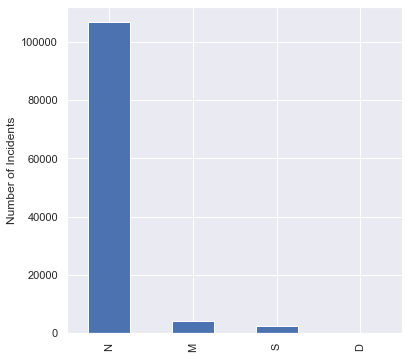

In [64]:
ax=Data['DAMAGE_LEVEL'].value_counts().plot(kind='bar',figsize=(6,6))
ax.set_ylabel('Number of Incidents')

""
